<a href="https://colab.research.google.com/github/allenhu08/capstone/blob/main/Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/allenhu08/capstone.git || cd capstone && git pull

Cloning into 'capstone'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 51 (delta 17), reused 20 (delta 3), pack-reused 0
Unpacking objects: 100% (51/51), done.
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('./capstone/datasets/rawdata_new.csv')


In [ ]:
print(df.columns.tolist())
print(df.head())

['id', 'date', 'total_agr_land', 'workforce', 'trees', 'arable_land', 'ley', 'perm_grass', 'perm_crops', 'prot_cult', 'add_agr_land', 'oth_land', 'qual_landscape', 'spec_crops', 'grapes', 'vegetables', 'fruits', 'oth_spec_crops', 'animal_unit', 'cattle_animal_unit', 'dairy_cows', 'suckler_cows', 'hor_shee_goa', 'pigs_poultry', 'pigs', 'poultry', 'eco_proof', 'organic', 'farmtype', 'region', 'age', 'educ', 'cons_general', 'percep_hail', 'percep_drought', 'percep_frost', 'percep_heavyrain', 'percep_longrain', 'percep_heat', 'cons_farm', 'self_reduc', 'self_act', 'self_cap', 'self_conf', 'self_not', 'legum', 'legum_eff', 'conc', 'conc_eff', 'add', 'add_eff', 'lact', 'lact_eff', 'breed', 'breed_eff', 'covman', 'covman_eff', 'comp', 'comp_eff', 'drag', 'drag_eff', 'cov', 'cov_eff', 'plough', 'plough_eff', 'solar', 'solar_eff', 'biog', 'biog_eff', 'ecodr', 'ecodr_eff', 'legum_imag', 'conc_imag', 'add_imag', 'lact_imag', 'breed_imag', 'covman_imag', 'comp_imag', 'drag_imag', 'cov_imag', 'plou

After loading the data, we now group the columns based on their purpose.

To begin with, we are only going to use the columns of measures' effectiveness.

In [37]:
farm_info_cols = ['total_agr_land', 'workforce', 'trees', 'arable_land', 'ley', 'perm_grass', 'perm_crops', 'prot_cult', 'add_agr_land', 'oth_land', 'qual_landscape', 'eco_proof', 'organic',  'age'] #'farmtype', 'region',
crops_info_cols = ['spec_crops', 'grapes', 'vegetables', 'fruits', 'oth_spec_crops']
animal_info_cols = ['animal_unit', 'cattle_animal_unit', 'dairy_cows', 'suckler_cows', 'hor_shee_goa', 'pigs_poultry', 'pigs', 'poultry']
attitude_info_cols = ['educ', 'cons_general', 'percep_hail', 'percep_drought', 'percep_frost', 'percep_heavyrain', 'percep_longrain', 'percep_heat', 'cons_farm', 'self_reduc', 'self_act', 'self_cap', 'self_conf', 'self_not']
meansures_info_cols = ['legum', 'legum_eff', 'conc', 'conc_eff', 'add', 'add_eff', 'lact', 'lact_eff', 'breed', 'breed_eff', 'covman', 'covman_eff', 'comp', 'comp_eff', 'drag', 'drag_eff', 'cov', 'cov_eff', 'plough', 'plough_eff', 'solar', 'solar_eff', 'biog', 'biog_eff', 'ecodr', 'ecodr_eff']
measures_effect_info_cols = ['legum_eff', 'conc_eff', 'add_eff', 'lact_eff', 'breed_eff', 'covman_eff', 'comp_eff', 'drag_eff', 'cov_eff', 'plough_eff', 'solar_eff', 'biog_eff', 'ecodr_eff']

# df = df[farm_info_cols + crops_info_cols + animal_info_cols + meansures_info_cols]
effect_df = df[measures_effect_info_cols]
effect_df = effect_df.fillna(0)
effect_df.head()
effect_vals = effect_df.values



Next, we define our truncated SVD function. It takes a parameter `k` that represents the number of features in the latent space. We will need to learn the best `k` value, and it should be limited to 2 to (numberOfColumns - 1).

In [ ]:
from scipy.linalg import sqrtm

def compute_svd(vals, k):
  # The magic happens here. U and V are user and item features
  U, s, V=np.linalg.svd(vals, full_matrices=False)
  s=np.diag(s)
  # we take only the k most significant features
  s=s[0:k,0:k]
  U=U[:,0:k]
  V=V[0:k,:]
  s_root=sqrtm(s)
  Usk = np.dot(U,s_root)
  skV = np.dot(s_root,V)
  UsV = np.dot(Usk, skV)

  return UsV

Now, we can run our SVD model with different `k`. As a start, we simply compare the predicted results against the original values, then calcuate the mean squared error. This will give us some ideas about overfitting and underfitting.

In [17]:

from sklearn.metrics import mean_squared_error

for k in range(2, len(effect_vals[0])):
  pred = compute_svd(effect_vals, k)

  print("k: ", k, " RMSE: ", mean_squared_error(effect_df, pred))

k:  2  RMSE:  1.2411394057543548
k:  3  RMSE:  1.0448868231714885
k:  4  RMSE:  0.859584740839658
k:  5  RMSE:  0.6913652961208363
k:  6  RMSE:  0.5666829435784825
k:  7  RMSE:  0.45479518487252946
k:  8  RMSE:  0.3486809065245669
k:  9  RMSE:  0.2618138692095433
k:  10  RMSE:  0.1765491842243626
k:  11  RMSE:  0.10162660795575242
k:  12  RMSE:  0.04373837283886026


Now we are going to use more finer grained training method. We are going to simulate that a farmer has not implemented any measure yet by setting their entire row to 0. Then, we run our SVD model and compare the prediction to the original values. The goal is still learning the best `k` that gives reasonable estimate.

In [46]:
def mask_v1(row, start=0, end=0):
  if end == 0:
    return 0
  else:
    row[start:end] = 0
    return row

def eval_v1(target, pred):
  return mean_squared_error(target, pred)

def learn_k(vals, mask_fn, eval_fn, mask_start=0, mask_end=0):
  num_records = len(vals)
  # print("num_records:", num_records)
  ks = []
  errs = []
  for i in range(num_records):
    arr = np.copy(vals)
    arr[i] = mask_fn(arr[i], mask_start, mask_end) #
    best_k = 2
    min_err = float('inf')
    
    for k in range(2, len(arr[0])):
      pred = compute_svd(arr, k)
      err = eval_fn(vals[i], pred[i])
      # err = abs(sum(vals[i] - pred[i]))
      # print("i: ", i, " - k: ", k, " - err ", err)
      if (err < min_err):
        min_err = err
        best_k = k
    
    # print("i: ", i, " - k: ", best_k, " RMSE: ", err)
    ks.append(best_k)
    errs.append(min_err)

  return ks, errs


Also, we are going to visualize the distribution of `k` and the error.

In [47]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(42)  # deterministic random data

def plot_learning_results(vals, mask_fn, eval_fn=eval_v1, plot_err=True, mask_start=0, mask_end=0):
  ks, errs = learn_k(vals, mask_fn, eval_fn, mask_start, mask_end)

  np.histogram(ks)
  _ = plt.hist(ks, bins='auto')  # arguments are passed to np.histogram
  mode = max(set(ks), key=ks.count)
  leg = 'mode: {}'.format(mode)
  plt.title("Distribution of Best Ks ({})".format(leg))
  plt.show()


  if plot_err:
    np.histogram(errs)
    _ = plt.hist(errs, bins='auto')  # arguments are passed to np.histogram
    mean = np.mean(errs)
    leg = 'mean: {}'.format(mean)
    plt.title("Distribution of Errors ({})".format(leg))
    plt.show()


Now let's look at the results.

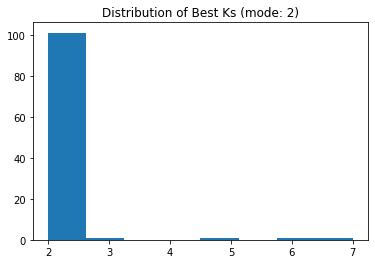

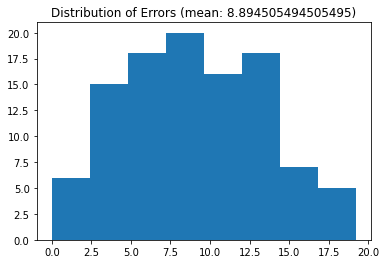

In [48]:

plot_learning_results(effect_vals, mask_v1)

Our current evaluation strategy is based off of existing data, to minize error from the existing data. Another reasonable strategy is to maximize the total effectiveness. To keep our code simple and generic, we are going to minize the negative value of the total effectiveness. 

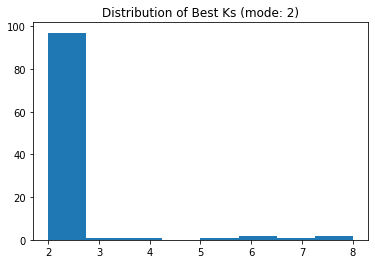

In [49]:
# since learn_k is minizing the error, we simply return the negative value of the sum 
def eval_v2(target, pred):
  return -sum(pred)


plot_learning_results(effect_vals, mask_v1, eval_v2, False)

As we can see, without knowing anything about the farmer. Our best `k` is jus the first value in most cases, so increasing number of features does not improve our prediction.

Next, we are going to include more information about the farms to see if they help with the prediction. We are only going to mask out the measure effectivenss.

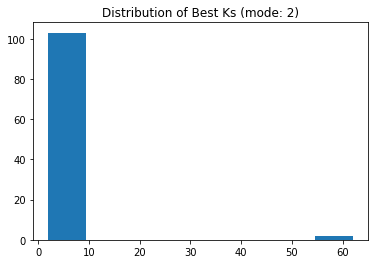

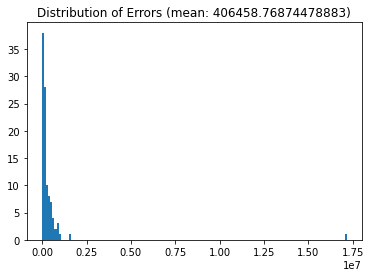

In [51]:
all_vals = df[farm_info_cols + crops_info_cols + animal_info_cols + meansures_info_cols + measures_effect_info_cols].fillna(0).values
start = len(farm_info_cols + crops_info_cols + animal_info_cols + meansures_info_cols)
end = start + len(measures_effect_info_cols)
plot_learning_results(all_vals, mask_v1, eval_v1, start, end)

Still the results is not that good. And because the scale is different among the different categories of columns, the error is really high.

Next, we are going to try to see what happens if we know some measures the farms have already taken, by randomly masking out some entries.

In [58]:
import random

def mask_v2(row, start = 0, end = 0):
  replace = [True, False]
  if end == 0:
    end = len(row)
  for i in range(start, end):
    if random.choice(replace):
      row[i] = 0
  
  return row

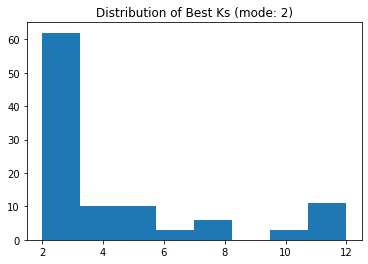

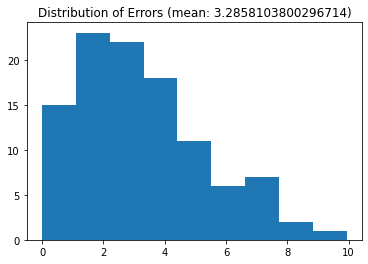

In [59]:
plot_learning_results(effect_vals, mask_v2)

The result is much more meaningful, we do not only see `k` = 2 now, and error is much lower as well.

Now, let's try with all the columns again.

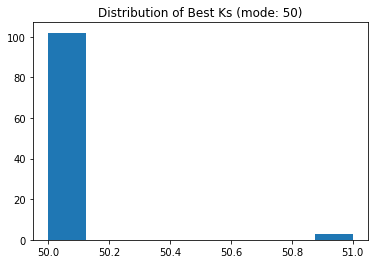

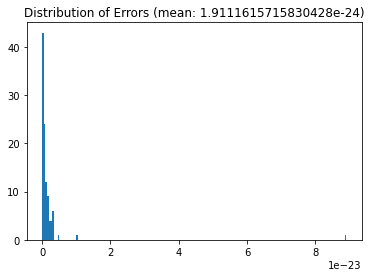

In [62]:

start = len(farm_info_cols + crops_info_cols + animal_info_cols + meansures_info_cols)
end = start + len(measures_effect_info_cols)
plot_learning_results(all_vals, mask_v2, eval_v1, start, end)

As expected, including the additional columns is not that helpful.

However, although we should not include these columns in our SVD model, maybe we can improve the result by clustering the farmers and farms first. With this thought, we are going to cluster the farmers, and then only apply the SVD-based prediction using data of farmers within the same cluster.

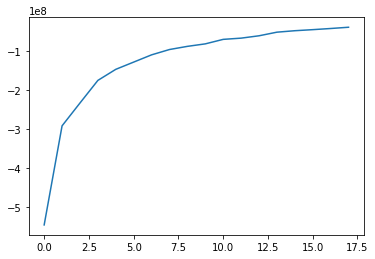

In [63]:
from sklearn.cluster import KMeans

traits_df = df[farm_info_cols + crops_info_cols + animal_info_cols].fillna(0)

scores = []
for i in range(2, 20):
  score = KMeans(n_clusters=i, random_state=42).fit(traits_df).score(traits_df)
  # print("cluster: ", i, " score ", score)
  scores.append(score)


plt.plot(scores)
plt.show()


As we can see, the score follows a logarithmic curve and the slope is less steep after `k` = 4. We will pick 4 as the number of clsuters. We can add the cluster index back to our dataframe.

In [64]:
n_clusters=4
model = KMeans(n_clusters=n_clusters, random_state=42).fit(traits_df)

model.labels_

trait_col = "trait_cluster"

df_with_trait = df.fillna(0)
df_with_trait.insert(1, trait_col, model.labels_)
df_with_trait

,id,trait_cluster,date,total_agr_land,workforce,trees,arable_land,ley,perm_grass,perm_crops,...,network,GHG_goal,env_goal,biodiv_goal,acknow_goal,yield_goal,income_goal,info_gew,info_resul,interviewtime
0,1,2,13.03.2019 10:59,4925.0,1.95406,79,3871,107,793,140,...,2,1,5,6,4,3,2,2,2,999.53
1,2,0,13.03.2019 11:08,2176.0,6.61310,12,1671,0,98,338,...,1,3,4,2,1,6,5,2,2,901.99
2,3,0,13.03.2019 11:37,2251.0,1.39384,31,1507,279,380,81,...,3,1,4,2,3,6,5,1,1,1832.99
3,4,0,13.03.2019 13:54,2389.0,1.99523,3,1969,71,322,0,...,1,2,5,4,1,3,6,2,1,2001.28
4,5,0,13.03.2019 14:18,3205.0,3.09942,39,1911,675,461,117,...,3,1,6,3,2,5,4,2,2,1809.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,101,0,15.04.2019 21:22,1786.0,0.86598,32,719,646,167,0,...,1,3,6,5,4,2,1,2,2,3430.37
101,102,3,02.05.2019 11:02,876.0,4.29667,0,0,227,260,389,...,3,3,5,4,1,2,6,2,1,5144.29
102,103,0,03.05.2019 19:39,2995.0,2.96772,64,879,987,1115,0,...,3,4,5,3,1,2,6,1,1,1371.41
103,104,2,06.05.2019 11:32,6520.0,4.04098,0,4720,374,1385,0,...,4,3,6,4,1,2,5,2,1,3201.48


A quick test is to include this cluster index column in our SVD model

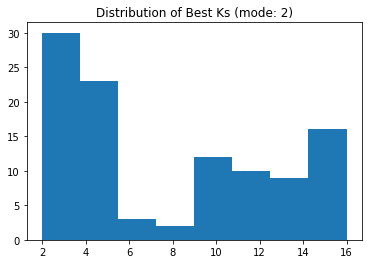

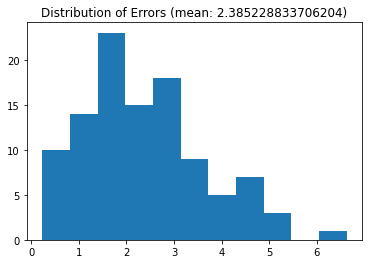

In [65]:
trait_measure_vals = df_with_trait[[trait_col] + meansures_info_cols + measures_effect_info_cols].values
plot_learning_results(trait_measure_vals, mask_v2)


The result has further improved.

Now we are going to re-implement the learning function to only compare against farmers within the cluster.

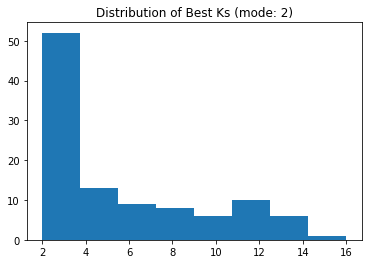

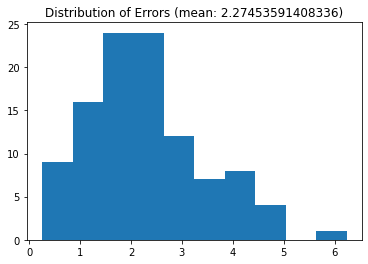

In [67]:
def learn_k_clustered(df, mask_fn):
  ks = []
  errs = []
  for n in range(n_clusters):
    vals = df[df[trait_col] == n].drop(columns=[trait_col]).values
    num_records = len(vals)
    for i in range(num_records):
      arr = np.copy(vals)
      arr[i] = mask_fn(arr[i]) #
      best_k = 2
      min_err = float('inf')
    
      for k in range(2, len(arr[0])):
        pred = compute_svd(arr, k)
        err = mean_squared_error(vals[i], pred[i])
        # err = abs(sum(vals[i] - pred[i]))
        # print("i: ", i, " - k: ", k, " - err ", err)
        if (err < min_err):
          min_err = err
          best_k = k
    
      # print("i: ", i, " - k: ", best_k, " RMSE: ", err)
      ks.append(best_k)
      errs.append(min_err)

  return ks, errs

trait_measure_df = df_with_trait[[trait_col] + meansures_info_cols + measures_effect_info_cols]

ks, errs = learn_k_clustered(trait_measure_df, mask_v2)

np.histogram(ks)
_ = plt.hist(ks, bins='auto')  # arguments are passed to np.histogram
mode = max(set(ks), key=ks.count)
leg = 'mode: {}'.format(mode)
plt.title("Distribution of Best Ks ({})".format(leg))
plt.show()


np.histogram(errs)
_ = plt.hist(errs, bins='auto')  # arguments are passed to np.histogram
mean = np.mean(errs)
leg = 'mean: {}'.format(mean)
plt.title("Distribution of Errors ({})".format(leg))
plt.show()

We have reached our best result with lowest error!

Just to explore, we are going to try with our initial masking method to replace all values with 0

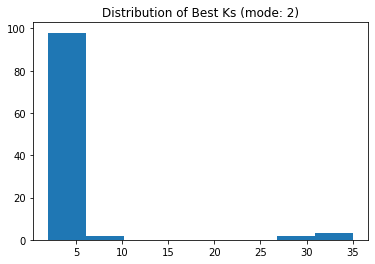

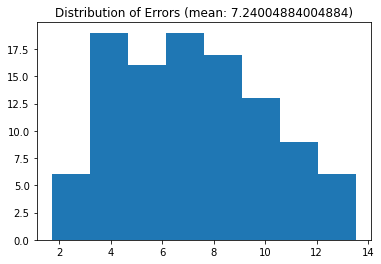

In [68]:

ks, errs = learn_k_clustered(trait_measure_df, mask_v1)

np.histogram(ks)
_ = plt.hist(ks, bins='auto')  # arguments are passed to np.histogram
mode = max(set(ks), key=ks.count)
leg = 'mode: {}'.format(mode)
plt.title("Distribution of Best Ks ({})".format(leg))
plt.show()


np.histogram(errs)
_ = plt.hist(errs, bins='auto')  # arguments are passed to np.histogram
mean = np.mean(errs)
leg = 'mean: {}'.format(mean)
plt.title("Distribution of Errors ({})".format(leg))
plt.show()

That has improved from the initial result too, but still does not work so well

In summary, we have a recommender system that works nicely if we know some data about the farmer. The result will be even better if we know traits about the farms.

In reality, this means if a farmer provides us the information about their farm, along with the measures they have already implemented, our recommender system can recommend other measure they could take, and predict the effectiveness.

In this analysis, we did not incorporate the other data such as attitudes toward the measures. This data could be useful as well since the effectiveness rating is subjective, so we may be able to get more accurate result considering their attitudes too.